<a href="https://colab.research.google.com/github/ioannis-toumpoglou/tensorflow-developer-repo/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem. A simple one is: predicting a numerical variable based on a combination of some other variables.

In [25]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.8.0


## Creating data to view and fit

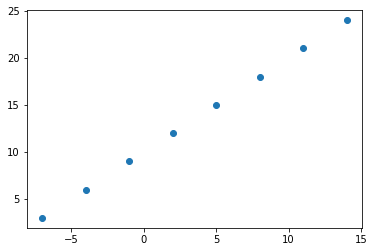

In [26]:
import numpy as np
import matplotlib as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.pyplot.scatter(X, y)

In [27]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [28]:
# Create a demo Tensor for a housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [29]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [30]:
X[0].ndim

0

In [31]:
X[0], y[0]

(-7.0, 3.0)

In [32]:
# Turn the NumPy arrays into Tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [33]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

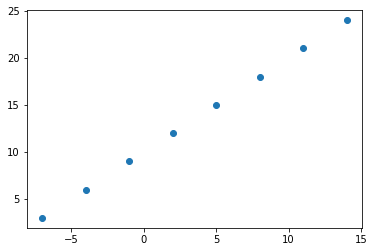

In [34]:
plt.pyplot.scatter(X, y)

## Steps in Modelling with TensorFlow
1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (the function that shows how wrong the model is), the optimizer (tells the model how to improve) and the evaluation metrics (what can be used to interpret the perfomance of the model).
3. **Fitting a model** - letting the model try to find patterns between X and y (features and labels).

In [35]:
# Set random seed
tf.random.set_seed(42)
# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1) # One input to one output value relationship                      
])
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae -> Mean Absolute Error
              optimizer=tf.keras.optimizers.SGD(), # SGD -> Stochastic Gradient Descent
              metrics=['mae'])
# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 312ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 14ms/step - loss: 10.9748 - mae: 10.9748


In [36]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [37]:
# Try and make a prediction using the model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

## Improving the Model
A model can be improved by altering the steps taken in the model creation.
1. **Creating a model** - add more layers, increase the number of hidden units (neurons) within each of the hidden layers or change the activation function of each layer.
2. **Compiling a model** - change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - fit the model for more epochs (longer training) or on more data (more examples to learn from).

In [61]:
## Rebuild the Model -> more epochs
# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1) # One input to one output value relationship                   
])
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae -> Mean Absolute Error
              optimizer=tf.keras.optimizers.SGD(), # SGD -> Stochastic Gradient Descent
              metrics=['mae'])
# 3. Fit the model (this time more epochs)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 312ms/step - loss: 18.9026 - mae: 18.9026
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 18.6214 - mae: 18.6214
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 18.3401 - mae: 18.3401
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 18.0589 - mae: 18.0589
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 17.7776 - mae: 17.7776
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 17.4964 - mae: 17.4964
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 17.2151 - mae: 17.2151
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 16.9339 - mae: 16.9339
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 16.6526 - mae: 16.6526
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 16.3714 - mae: 16.3714
Epoch 11/100
1/1 [==============================] - 0s 7m

In [59]:
# Data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [62]:
# Has the Model's prediction improved?
model.predict([17.0])

array([[29.46719]], dtype=float32)

In [81]:
# Another try to improve the Model
## Rebuild the Model -> use an additional layer (relu)
# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1) # One input to one output value relationship                   
])
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae -> Mean Absolute Error
              optimizer=tf.keras.optimizers.SGD(), # SGD -> Stochastic Gradient Descent
              metrics=['mae'])
# 3. Fit the model (this time more epochs)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 318ms/step - loss: 13.8087 - mae: 13.8087
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 13.3054 - mae: 13.3054
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 12.8015 - mae: 12.8015
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 12.2931 - mae: 12.2931
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 11.7788 - mae: 11.7788
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 11.2583 - mae: 11.2583
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 10.7208 - mae: 10.7208
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 10.1695 - mae: 10.1695
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 9.5915 - mae: 9.5915
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 8.9919 - mae: 8.9919
Epoch 11/100
1/1 [==============================] - 0s 7ms/

In [82]:
# Data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [83]:
# Has the Model's prediction improved?
model.predict([17.0])

array([[32.319572]], dtype=float32)

Even though the loss and mae decreased, the distance from the target (27) increased. This means that the Model is overfitting.

In [94]:
# Another try to improve the Model
## Rebuild the Model -> changes in additional layer and optimizer
# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation=None),
  tf.keras.layers.Dense(1) # One input to one output value relationship                   
])
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae -> Mean Absolute Error
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.05), # Adam
              metrics=['mae'])
# 3. Fit the model (this time more epochs)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 349ms/step - loss: 11.9261 - mae: 11.9261
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 8.5192 - mae: 8.5192
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 7.9875 - mae: 7.9875
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 7.8224 - mae: 7.8224
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 6.5047 - mae: 6.5047
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 6.3003 - mae: 6.3003
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 6.3694 - mae: 6.3694
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 5.7420 - mae: 5.7420
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 4.8857 - mae: 4.8857
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 4.9180 - mae: 4.9180
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 4.7

In [95]:
# Data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [96]:
# Has the Model's prediction improved?
model.predict([17.0])

array([[27.11746]], dtype=float32)

## Evaluating a Model
Typical workflow when building Neural Networks
Build -> Fit -> Evaluate -> Tweak -> Fit -> Evaluate -> Tweak -> ...

When it comes to evaluation:
> Visualize, visualize, visualize

It is a good idea to visualize:
1. The data - what kind of data are we working with? what does it look like?
2. The model - what does the model look like?
3. The training of the model - how does it perform when it learns?
4. The predictions of the model - how do they line up against the original labels?

In [98]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [99]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

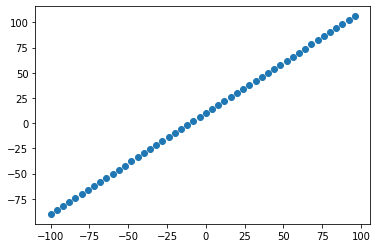

In [101]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)